# ***Final Project Data Mining***

1. Chrisogonus James Ang Gunadi (2006572932)
2. Daniel Rivaldo Haryanto (2006534890)
3. Dwight J. O. Hutagalung (2006571160)
4. Evan Haryowidyatna (2006485011)
5. Owen Susanto (2006570933)
6. Wildan Damar Adji (2006487326)


## Twitter *Data Scrapping*

Untuk melakukan *data scrapping* dari media sosial Twitter, kami menggunakan *package* **twint** dan **nest_asyncio**.

In [ ]:
! pip install --upgrade git+https://github.com/kevctae/twint.git
! pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-pes3j_1k
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-pes3j_1k
     |████████████████████████████████| 265 kB 4.6 MB/s 
     |████████████████████████████████| 385 kB 62.4 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 288 kB 49.2 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 59 kB 7.5 MB/s 
     |████████████████████████████████| 140 kB 75.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39180 sha256=578c6890e0a8d8a0926024a0ec3b0cd477ab37253d33d049053b0509d81c1701
  Stored in directory: /tmp/pip-ephem-wheel-cache-n1d1qny9/wheels/de/66/ce/1d0e7f533048436bc24ec9d2d55bc759542faa4fe80bc0b9

In [ ]:
import twint
import nest_asyncio
import pandas as pd

In [ ]:
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
config.Lang = "id"
config.Followers = 500

In [ ]:
config.Search = 'World Cup OR "Piala Dunia 2022" OR #PialaDunia OR #PialaDunia2022 OR #FIFAWorldCup OR #WorldCup lang:in'
# config.Search = "Piala Dunia 2022 Qatar"
config.Limit = 20000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

(20006, 38)


In [ ]:
data.to_csv("scraped_filter_id_rt_rp_lang_in.csv")

## *Text Cleaning*

Untuk melakukan *text cleaning*, kami menggunakan *package* **Sastrawi**.

In [ ]:
! pip install Sastrawi
! pip install unidecode
! pip install apyori
! pip install mlxtend
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=f80708bc69441606c7b2c29533bbfa5d9ac64f56debd231683119b6f347421d1
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

'Done'

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pigletpiglet/Final-Project-Data-Mining/main/scraped_filter_id_rt_rp.csv')
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [ ]:
Sastrawi_StopWords_id = factory.get_stop_words()


Sastrawi_StopWords_id = stopwords.words('indonesian') + Sastrawi_StopWords_id
print(Sastrawi_StopWords_id)

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id) # Biasakan hal ini

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
slang = pd.read_csv("https://raw.githubusercontent.com/pigletpiglet/Final-Project-Data-Mining/main/slangs.csv",header=None)

In [ ]:
slang = dict(zip(slang[0], slang[1]))

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    T = TextBlob(txt).words
    for i,t in enumerate(T):
      if t in slang.keys():
          T[i] = slang[t]
    docx = (" ".join(T))

    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'@[A-Za-z0-9_]+', ' ', docx) # Remove @
    docx = re.sub(r'#[A-Za-z0-9_]+', ' ', docx) # Remove #
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    docx = re.sub(r"[0-9]", ' ', docx)
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

In [ ]:
df['clean'] = df["tweet"] 

In [ ]:
df['clean'] = df['clean'].apply(cleanText)

In [ ]:
df.to_csv("data_cleaned_id_rt_rp_slang_number.csv")

## *Visualization*

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pigletpiglet/Final-Project-Data-Mining/main/data_cleaned_id_rt_rp_slang.csv')
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [ ]:
df["clean"].astype(str)

0          telunjukraung otongkoil pranked kalau foto diri
1        https jo1octlo6h berita leceh nabi muhammad be...
2                            bila malaysia masuk world cup
3        wahai managers lupa malam premier league gulir...
4        teman teman 2022 world cup selesai kenang sisa...
                               ...                        
20002                         jual langgan vidio world cup
20003    panjang world cup 2022 kali pasang taruh kali ...
20004               graviityv private nonton world cup kak
20005    shehnazik92 inshallah messi world cup uthaye m...
20006                      kalian nobar world cup dmn gaes
Name: clean, Length: 20007, dtype: object

### *Word Count*

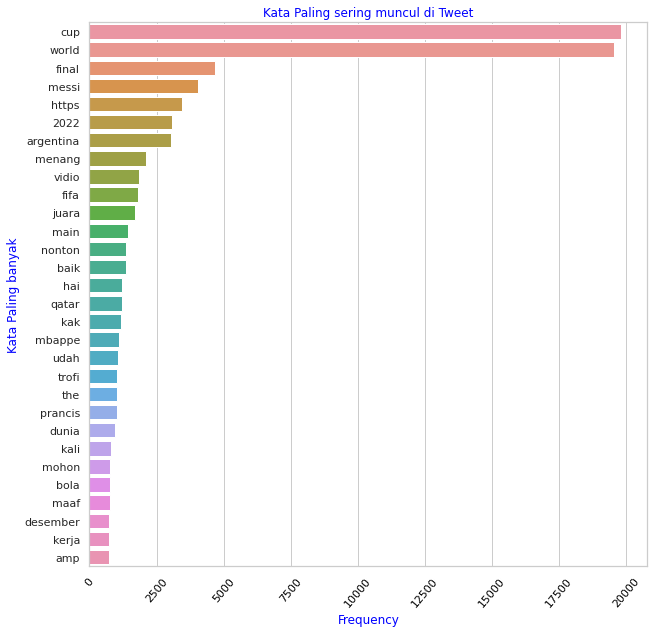

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

product = df['clean']
words = product.str.split(expand=True).unstack()
result_count = words.value_counts()
res = pd.DataFrame(result_count).reset_index()#converting to Dataframe and drop the Nones values
#res
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(10, 10)) 
sns.barplot(y=res.iloc[:,0][0:30], x=res.iloc[:,1][0:30], data=res, palette=None)
plt.ylabel('Kata Paling banyak', color="blue")  # Add an x-label to the axes.
plt.xlabel('Frequency', color="blue")  # Add a y-label to the axes.
plt.title("Kata Paling sering muncul di Tweet", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

### Cari @ (*username*)

In [ ]:
tweets = df[df['tweet'].str.match(r"@([a-zA-Z0-9]{1,15})")==True]

In [ ]:
users = tweets.username.to_list()
tweets = tweets.tweet.to_list()

In [ ]:
len(tweets)

5707

In [ ]:
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx

In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  4124
Banyak Edges =  0


In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8929
Banyak Edges =  7779


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pialadunianocut.gexf")

Export ke GexF untuk di import ke Gephi


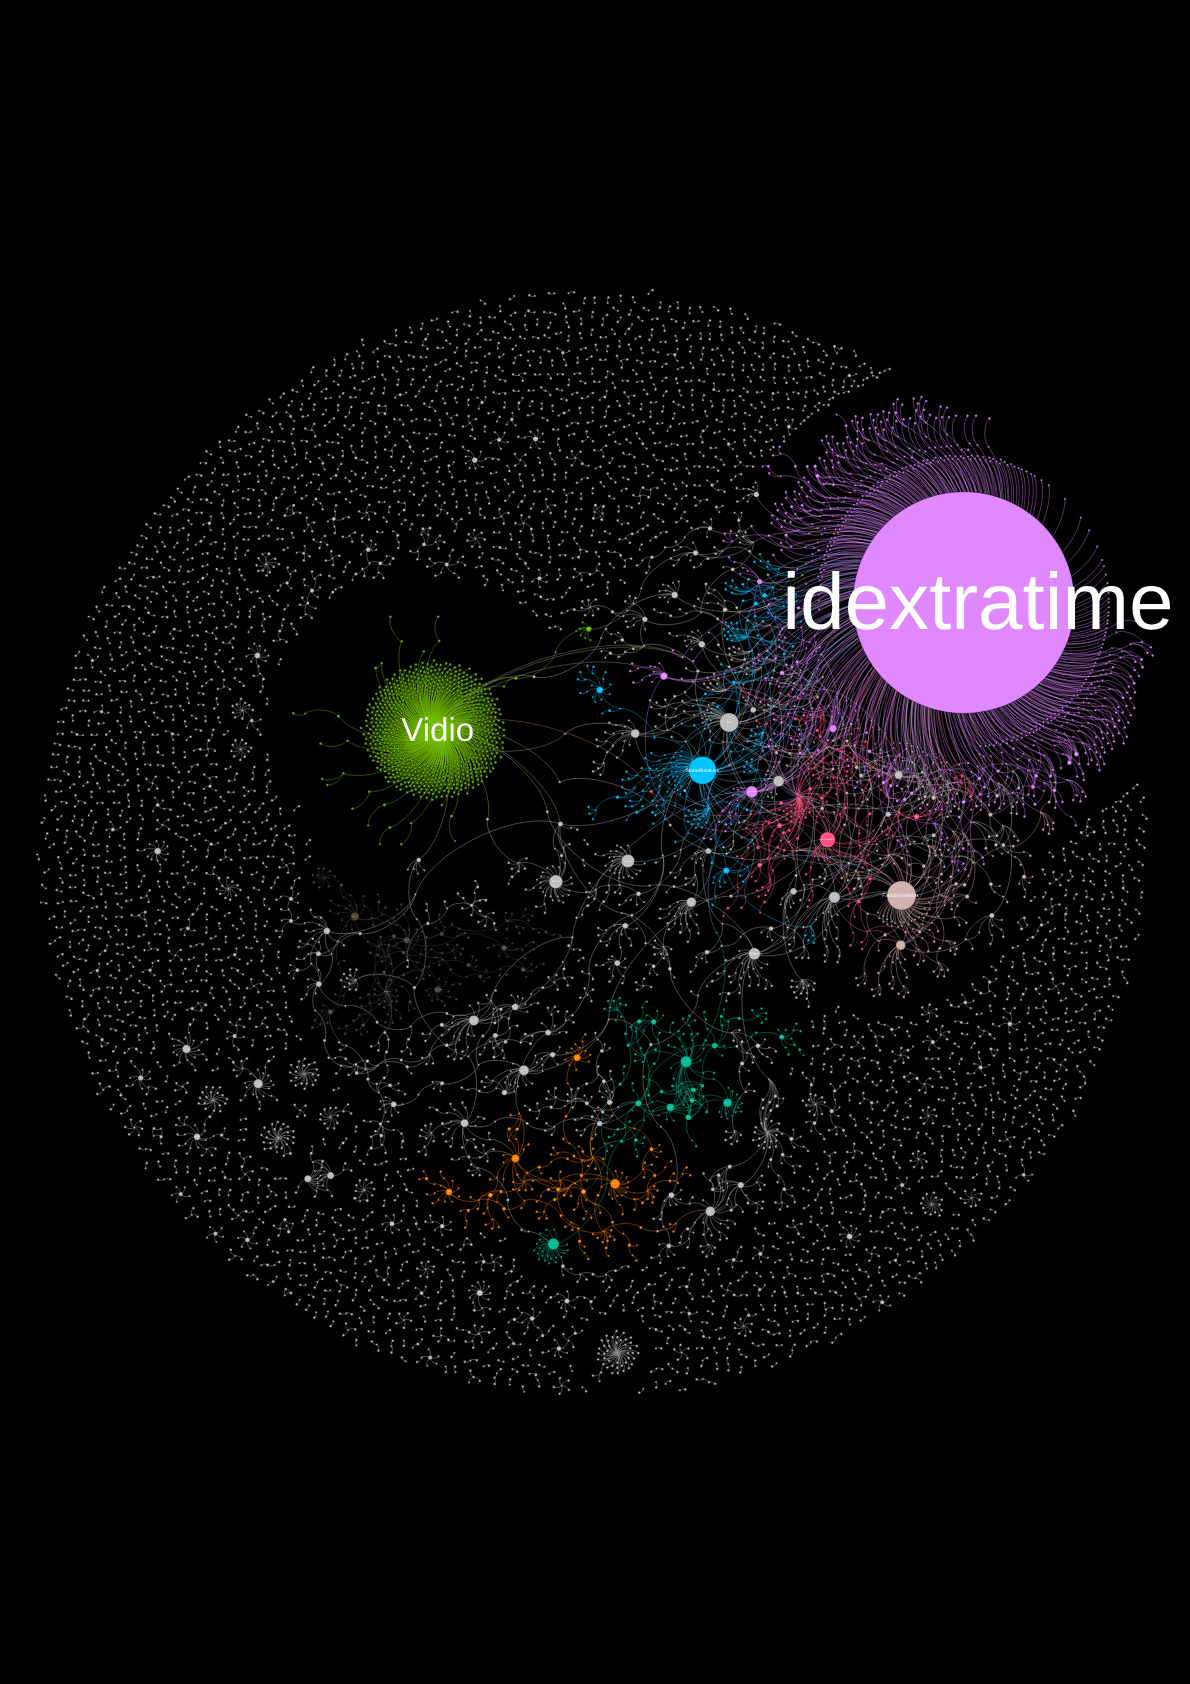

## *Sentiment Analysis*

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pigletpiglet/Final-Project-Data-Mining/main/Sentiment%20Analysis%20-%20Sentiment%20Analysis.csv')

In [ ]:
#import necessary library
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

set_stopwords = set(stopwords.words("english"))

def clean_txt(text): # define the function with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['tweet'] = data['tweet'].apply(clean_txt)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.sentimen.astype('int')

0       1
1       1
2       1
3       1
4       1
       ..
2995   -1
2996   -1
2997   -1
2998   -1
2999   -1
Name: sentimen, Length: 3000, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['tweet']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names())
df

,aa,aaaaaaaaaa,aaaaaaaaaaaaaaaa,aamiin,aap,aapne,aaryan,ab,aba,abad,...,zvc,zvqwzbym,zvvb,zw,zwlxv,zx,zy,zyhgtqpagf,zz,zzjyyjmc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encode = pd.DataFrame(data["sentimen"])

encoded = pd.get_dummies(encode,prefix="sentimen")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse=False)
y = y.fit_transform(data[['sentimen']])
df_y = pd.DataFrame(y)

In [ ]:
max_features = 35000
maxlen = 50

In [ ]:
import re,string,unicodedata
from keras.preprocessing import text, sequence

In [ ]:
import tensorflow as tf

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data["tweet"], df_y, test_size = 0.25 , random_state = 69)

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)

x_train = tf.keras.utils.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenizer.fit_on_texts(x_test)
tokenized_test = tokenizer.texts_to_sequences(x_test)

x_test = tf.keras.utils.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/glove_50dim_wiki_id_case_text.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index) + 1)
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
print(word_index)
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

{'cup': 1, 'world': 2, 'final': 3, 'messi': 4, 'di': 5, 'co': 6, 'https': 7, 'argentina': 8, 'yang': 9, 'ini': 10, 'ni': 11, 'yg': 12, 'ya': 13, 'vidio': 14, 'fifa': 15, 'dan': 16, 'menang': 17, 'juara': 18, 'nonton': 19, 'ada': 20, 'qatar': 21, 'bisa': 22, 'hai': 23, 'aku': 24, 'mbappe': 25, 'untuk': 26, 'tahun': 27, 'piala': 28, 'pada': 29, 'dah': 30, 'dari': 31, 'atas': 32, 'ga': 33, 'tapi': 34, 'ke': 35, 'sudah': 36, 'dia': 37, 'lagi': 38, 'jadi': 39, 'semua': 40, 'dengan': 41, 'dunia': 42, 'buat': 43, 'kali': 44, 'tak': 45, 'mohon': 46, 'terbaik': 47, 'kak': 48, 'mf': 49, 'sama': 50, 'desember': 51, 'amp': 52, 'udah': 53, 'bola': 54, 'france': 55, 'nya': 56, 'team': 57, 'nak': 58, 'la': 59, 'itu': 60, 'fifaworldcup': 61, 'tu': 62, 'tengok': 63, 'ronaldo': 64, 'gak': 65, 'idextratime': 66, 'main': 67, 'akan': 68, 'gangguan': 69, 'baru': 70, 'juga': 71, 'terjadi': 72, 'teknis': 73, 'sebagian': 74, 'pelanggan': 75, 'sih': 76, 'aja': 77, 'best': 78, 'goat': 79, 'kami': 80, 'na': 81, '

In [ ]:
batch_size = 128
epochs = 10
embed_size = 50

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=50, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs) 

Epoch 1/10
18/18 [==============================] - 7s 414ms/step - loss: 0.0478 - acc: 0.9778 - val_loss: 1.2442 - val_acc: 0.5827
Epoch 2/10
18/18 [==============================] - 8s 425ms/step - loss: 0.0340 - acc: 0.9831 - val_loss: 1.4610 - val_acc: 0.5733
Epoch 3/10
18/18 [==============================] - 8s 423ms/step - loss: 0.0258 - acc: 0.9871 - val_loss: 1.3961 - val_acc: 0.5680
Epoch 4/10
18/18 [==============================] - 7s 414ms/step - loss: 0.0320 - acc: 0.9849 - val_loss: 1.3518 - val_acc: 0.5400
Epoch 5/10
18/18 [==============================] - 8s 419ms/step - loss: 0.0187 - acc: 0.9916 - val_loss: 1.5917 - val_acc: 0.5507
Epoch 6/10
18/18 [==============================] - 8s 421ms/step - loss: 0.0161 - acc: 0.9933 - val_loss: 1.6244 - val_acc: 0.5427
Epoch 7/10
18/18 [==============================] - 7s 417ms/step - loss: 0.0135 - acc: 0.9929 - val_loss: 1.7484 - val_acc: 0.5480
Epoch 8/10
18/18 [==============================] - 7s 411ms/step - loss: 0.

In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

24/24 [==============================] - 1s 28ms/step - loss: 1.8502 - acc: 0.5627
Accuracy of the model on Testing Data is -  56.2666654586792


In [ ]:
pred = (model.predict(x_test))
# pred = model.predict_classes(X_test)
pred[:20]

24/24 [==============================] - 1s 27ms/step


array([[4.5425331e-08, 1.0000000e+00, 2.8889023e-08],
       [1.1848152e-06, 9.9999797e-01, 8.0528821e-07],
       [7.2890003e-07, 9.9999702e-01, 2.2550582e-06],
       [4.9025846e-07, 9.9999857e-01, 9.5262209e-07],
       [1.0078890e-08, 1.0000000e+00, 2.0350834e-08],
       [1.2706084e-03, 9.8520201e-01, 1.3527345e-02],
       [1.3254785e-04, 8.5879333e-04, 9.9900872e-01],
       [3.3921987e-02, 2.1369015e-01, 7.5238782e-01],
       [3.6799986e-04, 9.9959749e-01, 3.4597182e-05],
       [1.4896386e-07, 9.9999940e-01, 4.8531024e-07],
       [3.2141495e-02, 6.0049212e-01, 3.6736640e-01],
       [2.2481314e-03, 1.3032582e-05, 9.9773884e-01],
       [2.6401002e-03, 9.9267220e-01, 4.6876962e-03],
       [1.9057333e-01, 5.8911163e-02, 7.5051552e-01],
       [2.6582615e-08, 1.0000000e+00, 3.7254409e-08],
       [1.4021420e-08, 1.0000000e+00, 1.1353960e-08],
       [2.8016989e-03, 6.8720198e-01, 3.0999631e-01],
       [3.6084373e-09, 1.0000000e+00, 1.8246464e-09],
       [3.1912464e-08, 1.000

In [ ]:
sample = pd.read_csv("https://raw.githubusercontent.com/pigletpiglet/Final-Project-Data-Mining/main/sentimensample.csv")

In [ ]:
dates=sample

In [ ]:
sample['tweet'] = sample['tweet'].apply(clean_txt)

In [ ]:
# tokenizer.fit_on_texts(sample['tweet'])
tokenized_sample = tokenizer.texts_to_sequences(sample['tweet'])

sample = tf.keras.utils.pad_sequences(tokenized_sample, maxlen=maxlen)

In [ ]:
len(x_test)

750

In [ ]:
pred = (model.predict(sample))

532/532 [==============================] - 15s 28ms/step


In [ ]:
np.argmax(pred[10])

0

In [ ]:
dates.head()

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean
0,3000,3000,1605504793832587264,1605487802723901441,1.671617e+12,2022-12-21 10:05:46,0,NaN,sawerapasha lekin kya pakistani team india wor...,in,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'sawerapasha', 'name': 'Sawer...",NaN,NaN,NaN,NaN,sawerapasha lekin kya pakistani team india wor...
1,3001,3001,1605504620003934209,1605504620003934209,1.671617e+12,2022-12-21 10:05:04,0,NaN,klub dengan gol terbanyak di world cup psg bar...,in,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,klub gol world cup 2022 psg barcelona manchest...
2,3002,3002,1605504311609688064,1605504311609688064,1.671617e+12,2022-12-21 10:03:51,0,NaN,rtm malaysia negara luar main world cup bukan ...,in,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,rtm malaysia negara main world cup main ambik ...
3,3003,3003,1605504249755860992,1605504249755860992,1.671617e+12,2022-12-21 10:03:36,0,NaN,habis world cup kita layan aff support negara ...,in,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,habis world cup layan aff dukung negara
4,3004,3004,1605504184186310656,1605469460239855617,1.671617e+12,2022-12-21 10:03:20,0,NaN,yaelah idextratime bahkan jauh sebelum dn aidi...,in,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'yaelah97_', 'name': 'mohreza...",NaN,NaN,NaN,NaN,yaelah97 idextratime aidit messi ramal juara w...


In [ ]:
dates['sentimen'] = 0

In [ ]:
for x in range(len(pred)) :
  dates['sentimen'][x] = np.argmax(pred[x])

In [ ]:
dates = dates[['id','tweet','clean','sentimen']]

In [ ]:
dates.to_csv("predicted.csv")

In [ ]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result
import matplotlib.pyplot as plt

text = dates['clean']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values

In [ ]:
negatif = pd.DataFrame(dates[dates['sentimen']==0]['clean'].str.split(expand=True).unstack().value_counts()).reset_index()
netral = pd.DataFrame(dates[dates['sentimen']==1]['clean'].str.split(expand=True).unstack().value_counts()).reset_index()
positif = pd.DataFrame(dates[dates['sentimen']==2]['clean'].str.split(expand=True).unstack().value_counts()).reset_index()

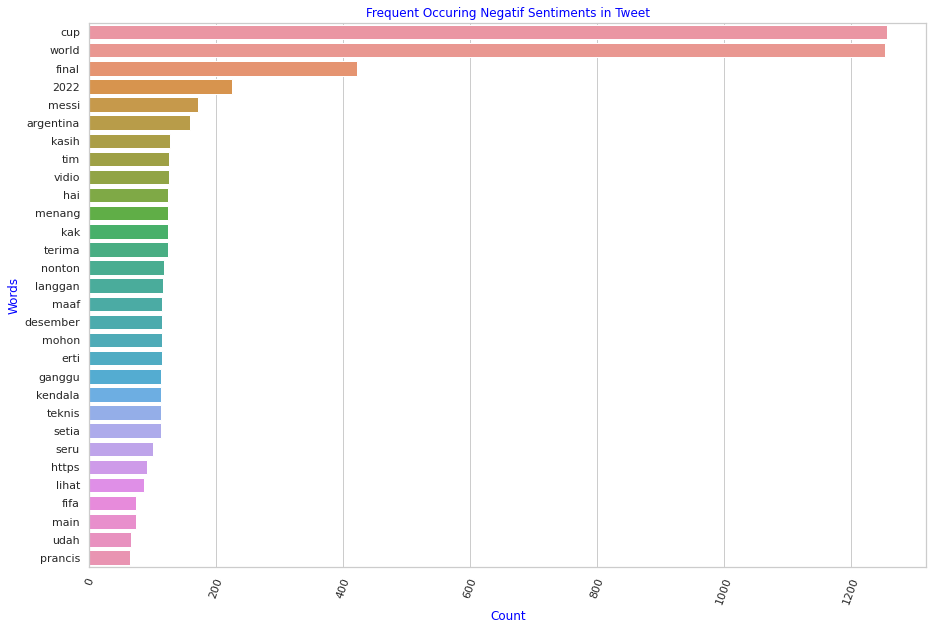

In [ ]:
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=negatif['index'][0:30], x=negatif[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Negatif Sentiments in Tweet", color="blue") 
plt.xticks(rotation=70);
plt.show()

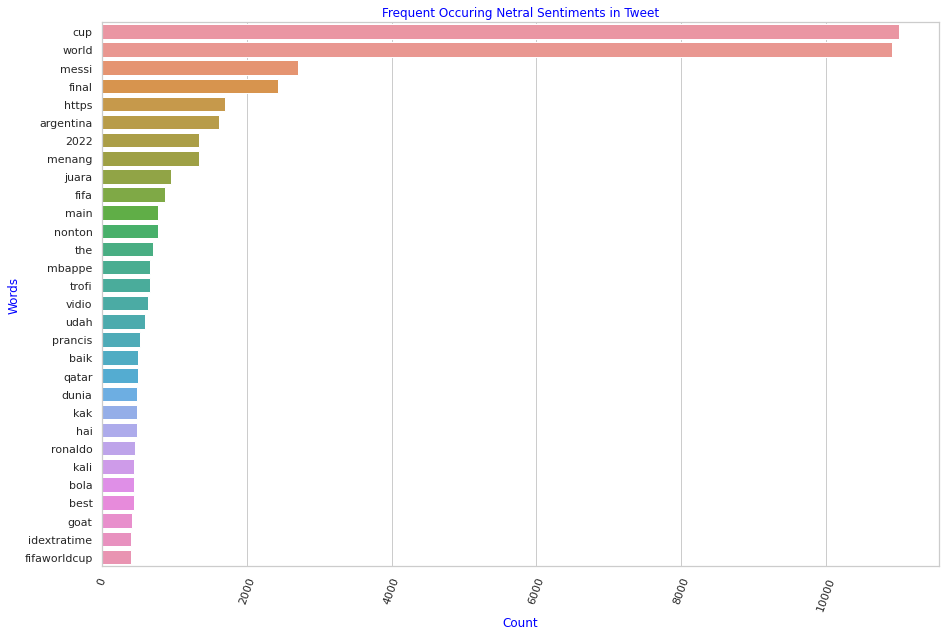

In [ ]:
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=netral['index'][0:30], x=netral[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Netral Sentiments in Tweet", color="blue") 
plt.xticks(rotation=70);
plt.show()

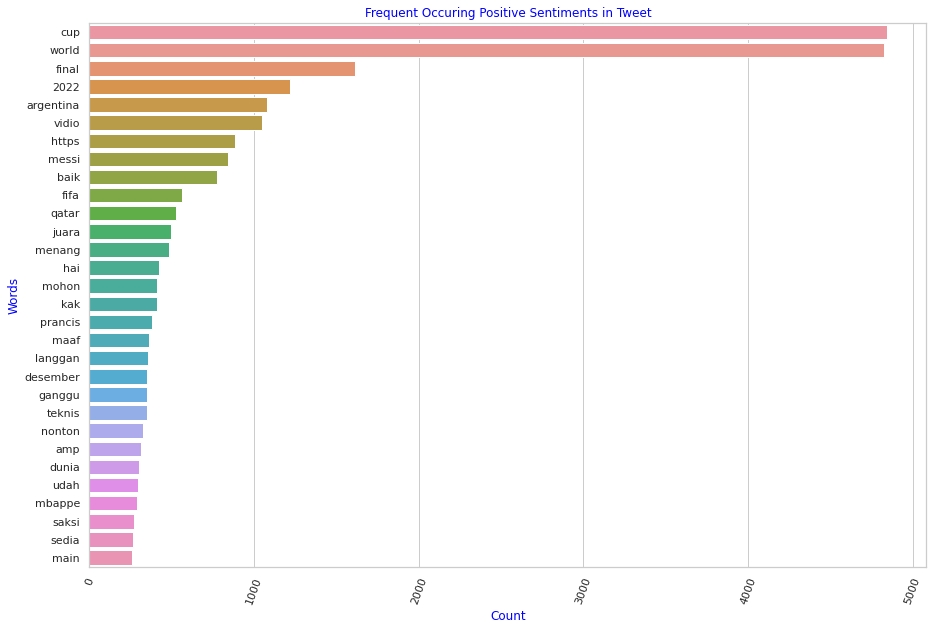

In [ ]:
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=positif['index'][0:30], x=positif[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Positive Sentiments in Tweet", color="blue") 
plt.xticks(rotation=70);
plt.show()

## *Insights*

### *Insight* 1

Berikut akan dilihat kata yang paling sering muncul pada *tweet* yang dicuitkan oleh *user*.

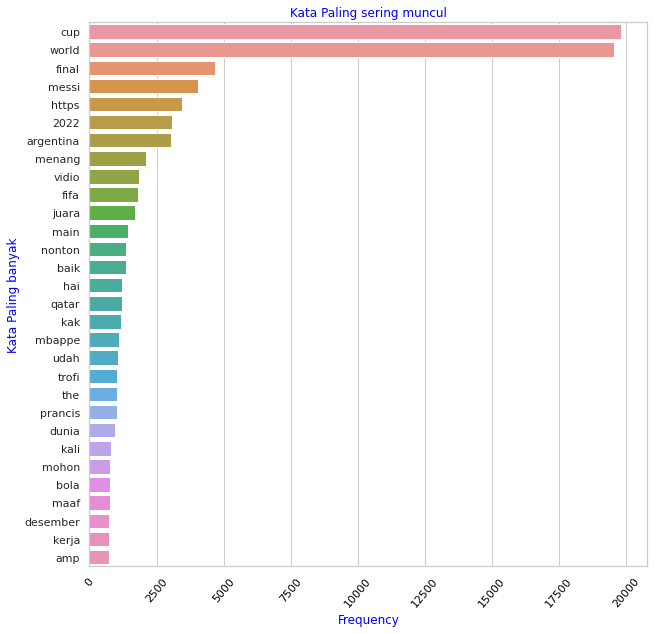

Dari visualisasi di atas, dapat dilihat bahwa kata yang paling sering muncul pada *tweet* adalah ***cup***, ***world***, ***final***, ***messi***, dan ***https***. Kata *https* masuk dalam daftar kata yang sering muncul karena kebanyakan *tweets* dari *user* dibarengi dengan gambar/video, di mana semua gambar/video yang ditautkan akan menjadi sebuah tautan dengan awalan *https*.

Kami juga membuat visualisasi untuk melihat kata yang sering muncul pada *tweets* yang kami nilai positif, negatif, dan netral berikut ini.

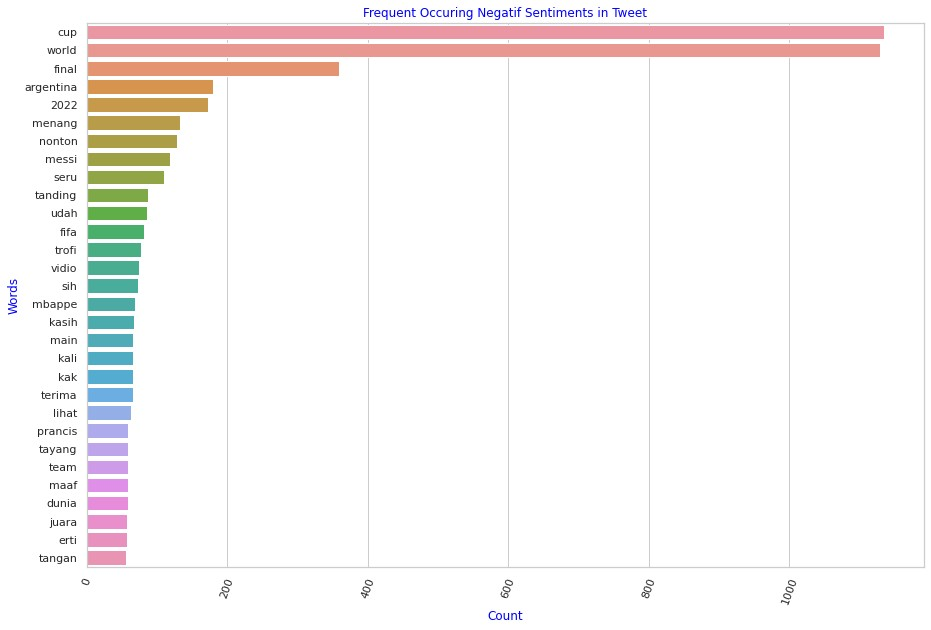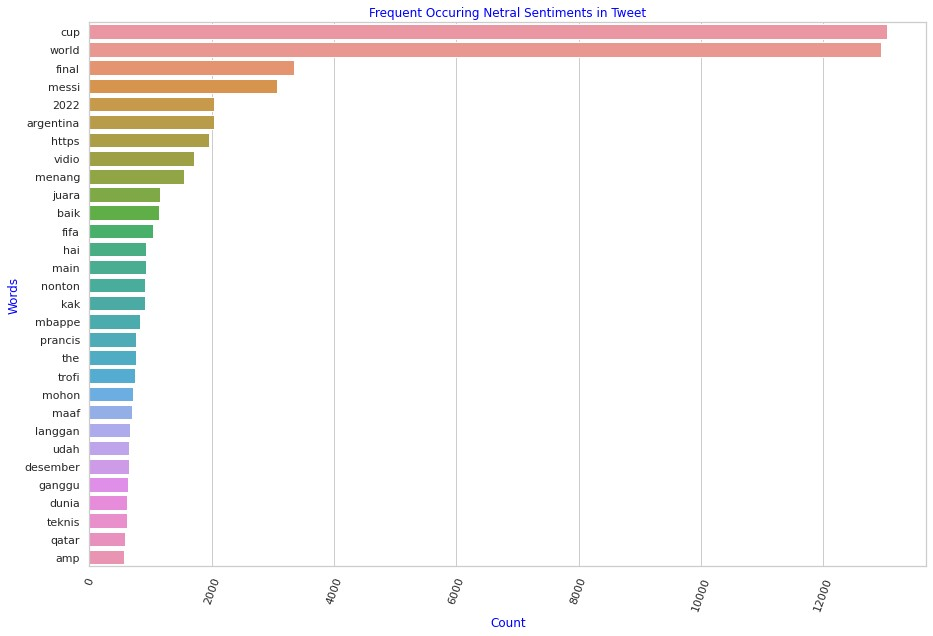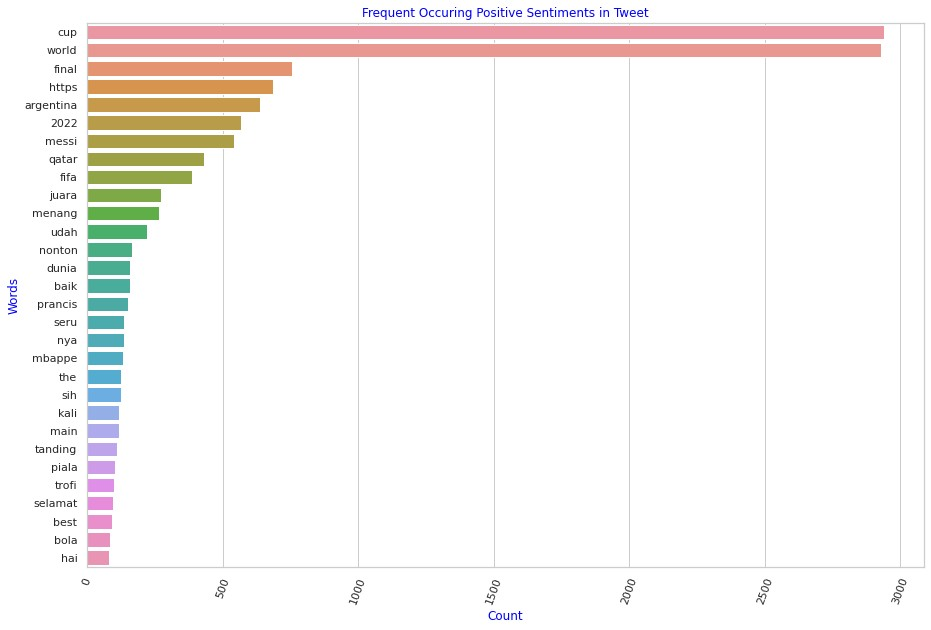

Dari tiga visualisasi tambahan di atas, dapat dilihat bahwa memang kata yang sering muncul adalah "*cup*", "*world*", dan "*final*", tetapi ada beberapa perbedaan pada kata yang sering muncul, yakni kata "maaf" yang muncul pada *tweets* yang kami nilai bersentimen negatif atau netral.

### *Insight* 2

Selain itu, kelompok kami juga menggunakan **Voyant Tools** dan kami mendapat beberapa *insights* dari visualisasi berikut.

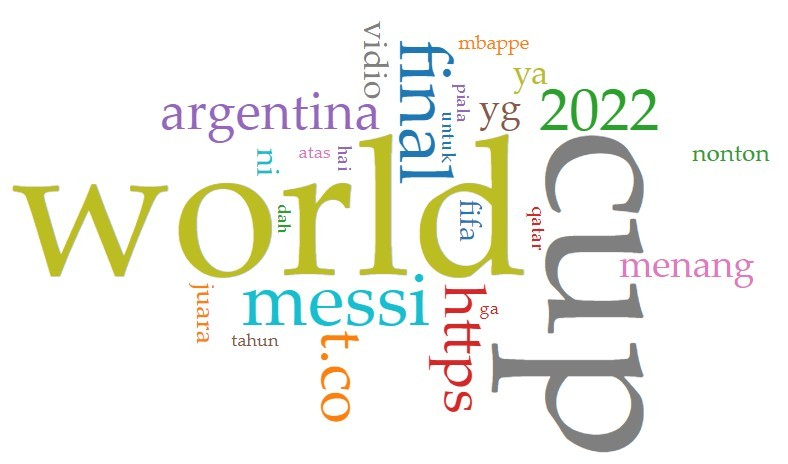

Gambar di atas menjelaskan kata-kata utama yang sering muncul pada data *tweets* yang kami gunakan. Kata-kata yang sering muncul adalah "cup", "world", "final", "messi", "argentina", "https", "t.co".

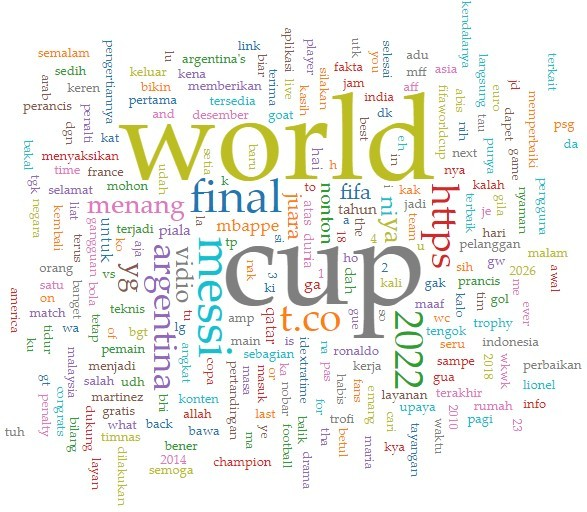

Untuk gambar di atas, kami mengeluarkan semua *terms* yang sering muncul pada data *tweets* karena dapat menjadi gambaran bagi pembaca.

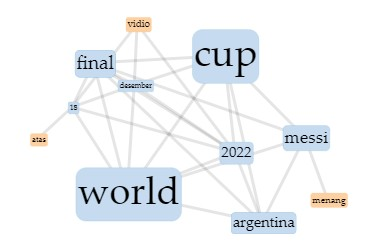

Dari hasil visualisasi dengan Voyant Tools di atas, dapat dilihat bahwa *tweet* yang sering muncul cenderung memiliki gabungan dari kata yang ada di gambar tersebut, atau jika kita mencoba membuat topik menjadi satu kalimat, maka kemungkinan yang muncul adalah "*world cup final* desember 2022 dimenangkan oleh messi dan argentina yang dapat disaksikan di vidio".

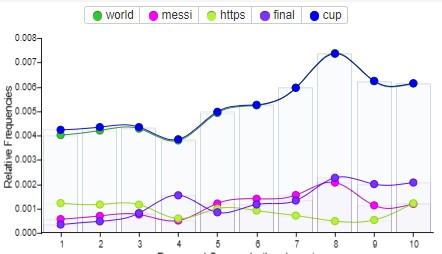

Gambar di atas merupakan salah satu visualisasi lainnya dengan kata yang sering muncul adalah "*world*", "*messi*", "*https*", "*final*", dan "*cup*", dengan kata "*final*" dan "*cup*" merupakan kata yang memiliki frekuensi relatif tertinggi.

### *Insight* 3

Untuk *Social Media Analysis* lainnya, kami menggunakan **Gephi** untuk memvisualisasikan *networking* antar *user*.

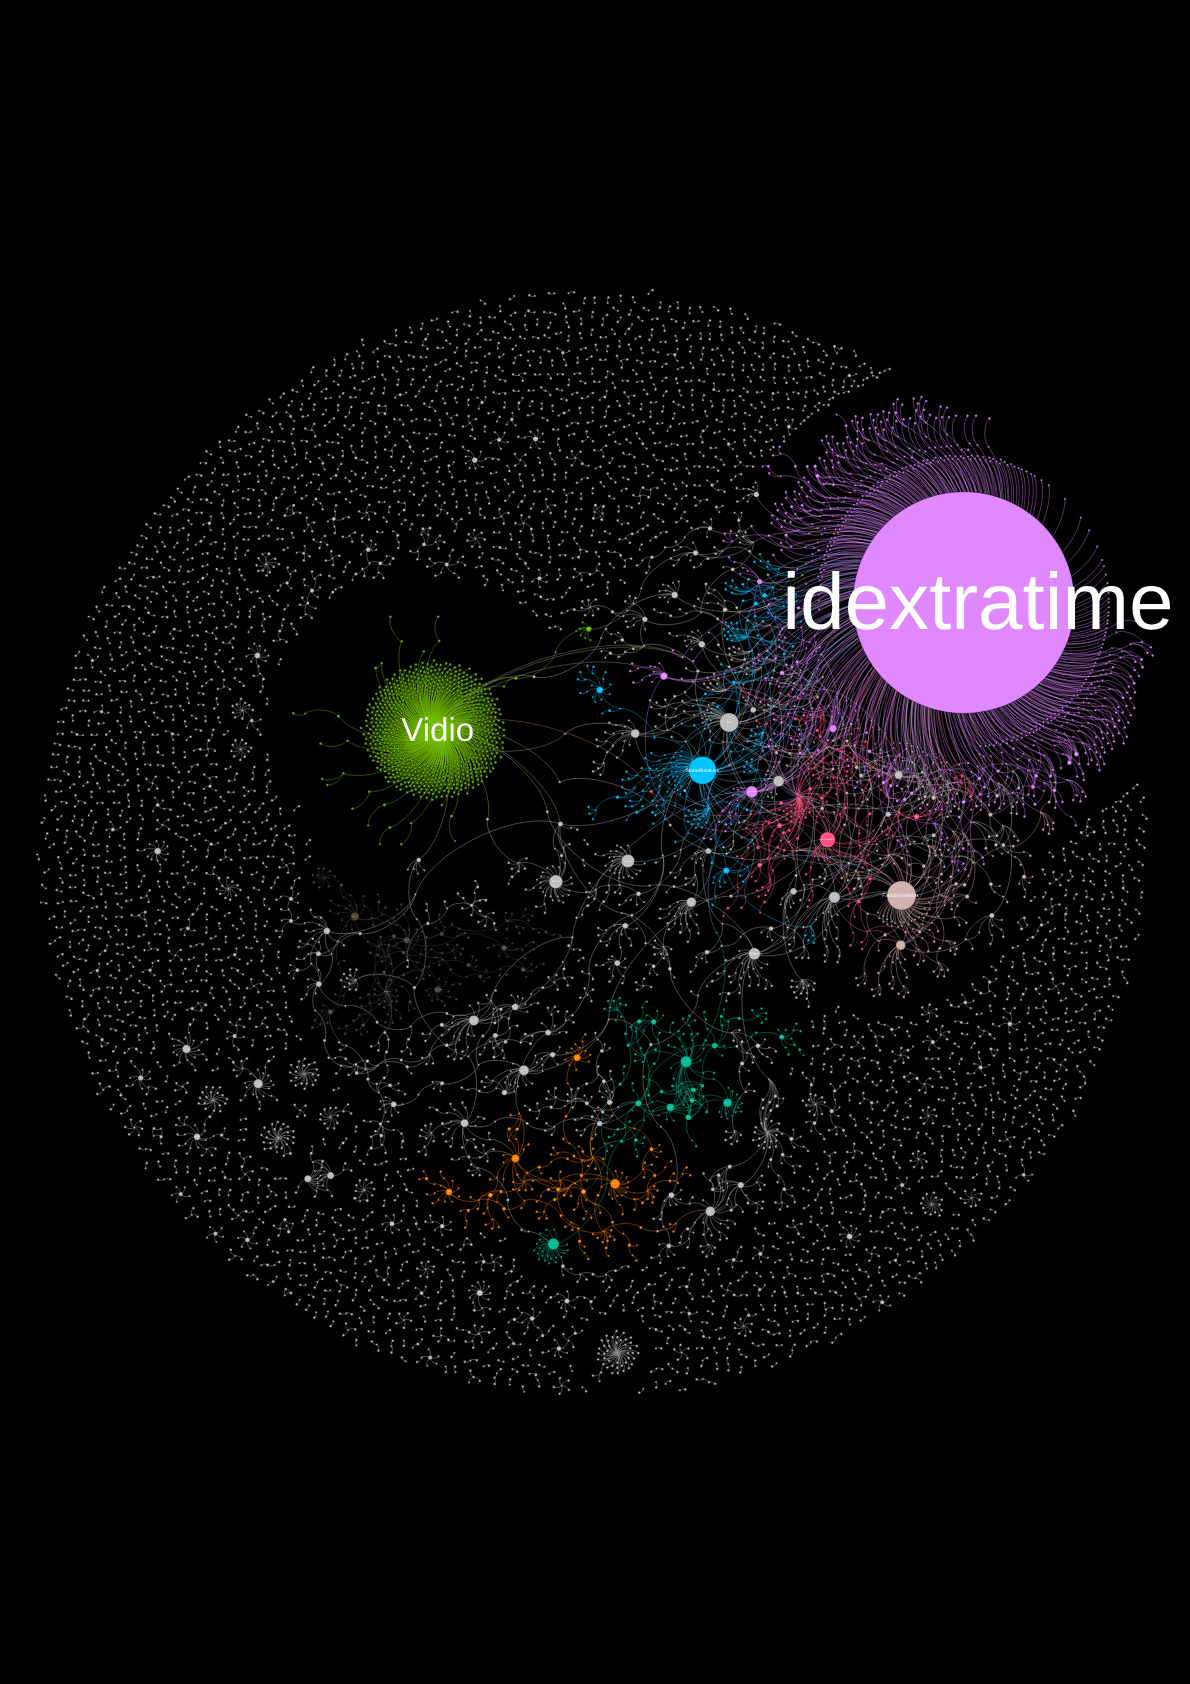

Dari visualiasi di atas, terdapat 4 *cluster* besar, yakni: 

1.   idextratime
2.   Vidio
3.   SiaranBolaLive
4.   FaktaSepakBola



### *Insight* 4

* Dilihat dari *predicted*, terdapat 6.36% dari keseluruhan *tweet* menunjukkan sentimen negatif, 76.85% menunjukkan sentimen netral, dan 16.78% *tweet* menunjukkan sentimen positif terhadap Piala Dunia Qatar 2022.
* *Overall*, hal ini menunjukkan bahwa secara umum, pelaksanaan Piala Dunia mendapat lebih banyak sentimen positif dari masyarakat Indonesia.
* Selain analisis sentimen, kami juga mendapatkan *insight* berupa nama pemain yang sering muncul dalam *tweet* masyarakat Indonesia, yakni **Messi**, **Mbappe**, dan **Emil Martinez**.
* Pada data *tweets* yang kami gunakan, beberapa *tweets* merujuk pada *platform* Vidio.com, yang merupakan salah satu *platform streaming* yang paling sering digunakan (yang tentunya dalam kasus ini untuk *streaming* Piala Dunia 2022). Namun, kebanyakan *tweets* yang ditujukan kepada Vidio.com merupakan *tweet* laporan masalah. Hal ini tentunya dapat menjadi pertimbangan bagi Vidio.com untuk bisa meningkatkan fitur pada *platform*-nya.
* Selain ke Vidio.com, *tweet* masyarakat Indonesia juga dicuitkan ke idextratime, akun penggemar sepak bola Indonesia, dan mayoritas *tweets*-nya merupakan *tweet* yang bersifat menyindir dan sarkasme, terutama terhadap kondisi sepak bola yang ada di ASEAN, yaitu AFF, ketika dibandingkan dengan Piala Dunia. Hal ini tentunya juga dapat menjadi pertimbangan bagi organisasi ASEAN dalam menyelenggarakan serta memberi standar yang baik bagi turnamen sepak bola AFF.
